# 데이터시각화 특강 기말 대비 (12월05일 update) 

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연

In [165]:
import numpy as np 
import pandas as pd 
import warnings
import matplotlib.pyplot as plt 
from IPython.display import HTML
import folium
import json
import requests

### wideform / longform

<AxesSubplot:xlabel='(국가, 국가)'>

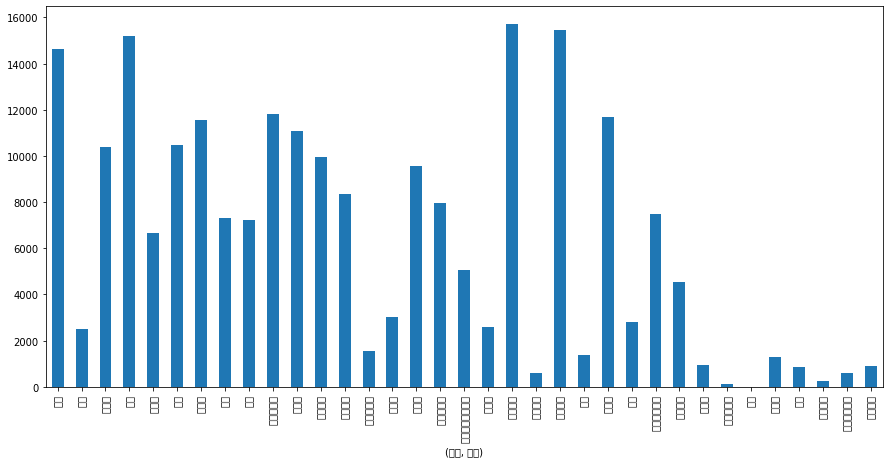

In [287]:
import warnings 
warnings.filterwarnings('ignore')
df=pd.read_html('http://ncov.mohw.go.kr/bdBoardList_Real.do?brdId=1&brdGubun=14&ncvContSeq=&contSeq=&board_id=&gubun=',encoding='utf-8')[2]
df.set_index(('국가',      '국가')).iloc[:,[1,3,4]].plot.bar(y=('감염자', '발생률 (*)'),figsize=(15,7),legend=False)

In [330]:
df.columns=['city','positive cases','positive ratio','death cases','death ratio','death toll']

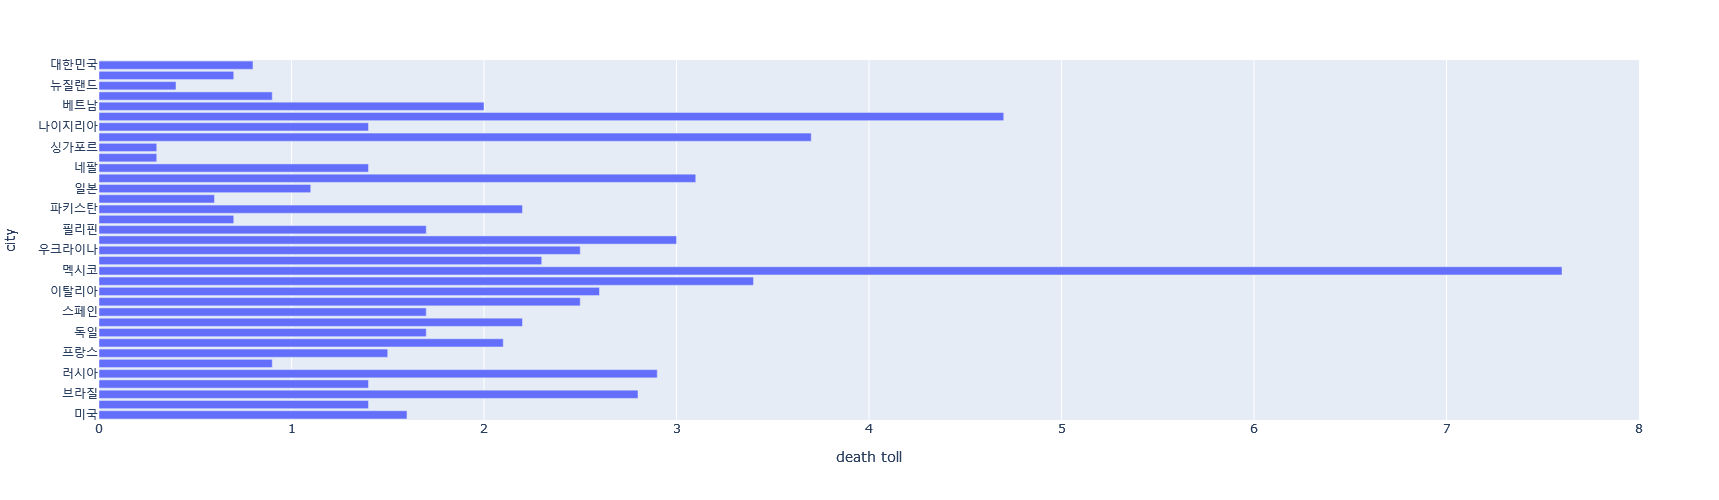

In [351]:
df.plot.barh(backend='plotly',y='city',x='death toll',height=500)

### stack(), reset_index(), melt(), set_index()

### groupby()

### map(), applymap(), lambda

### pipe()

### pandas backend를 이용한 plot은 아주 잘 숙지하고 계셔야합니다.

### ggplot을 이용한 고난도 문제가 출제될 수 있습니다.

In [176]:
df=pd.read_csv('pollution-deaths-from-fossil-fuels.csv')
df.iloc[list(map(lambda x: 'A' in x, df['Entity'])),:]

,Entity,Code,Year,Excess mortality from fossil fuels
0,Afghanistan,AFG,2015,2494
1,Africa,NaN,2015,67132
2,Albania,ALB,2015,1308
3,Algeria,DZA,2015,2008
4,Angola,AGO,2015,622
5,Antigua and Barbuda,ATG,2015,4
6,Argentina,ARG,2015,3815
7,Armenia,ARM,2015,1240
8,Australia,AUS,2015,1451
9,Austria,AUT,2015,7835


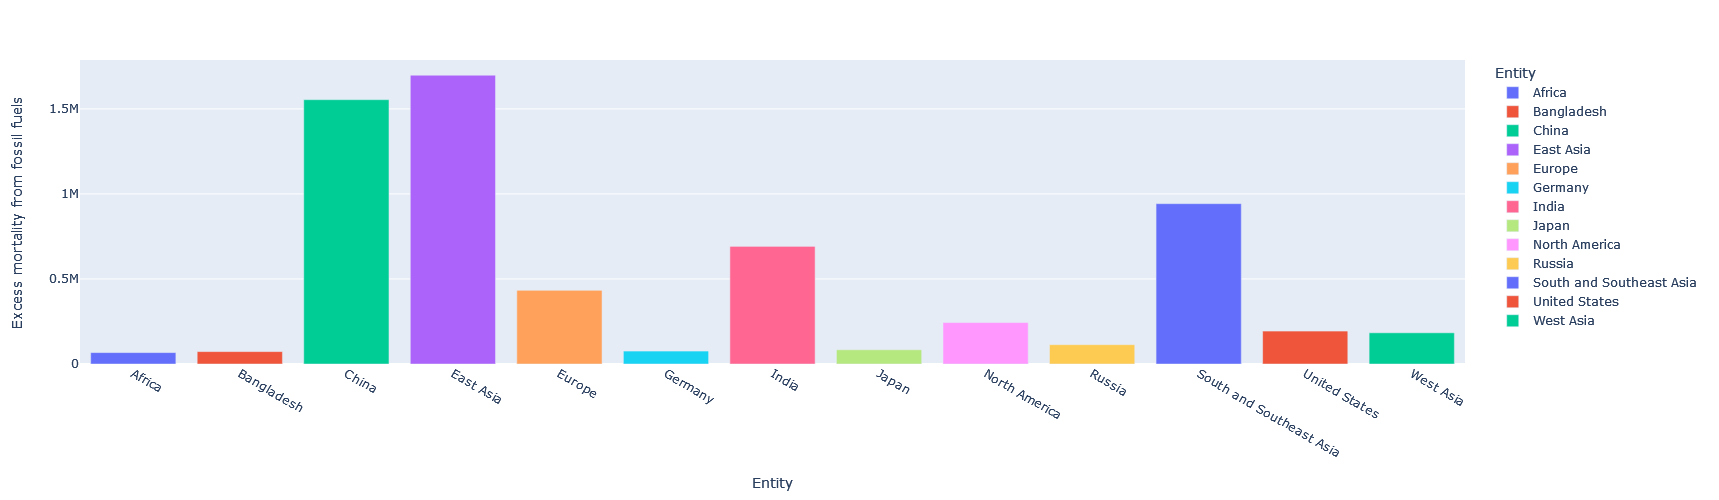

In [99]:
df.loc[lambda df:(df['Excess mortality from fossil fuels']>60000) & (df['Excess mortality from fossil fuels']<2000000),:].plot.bar(backend='plotly',y='Excess mortality from fossil fuels',x='Entity',color='Entity',height=500)

In [163]:
df.iloc[list(map(lambda x: 'World' not in x,df['Entity'])),:]

,Entity,Code,Year,Excess mortality from fossil fuels
0,Afghanistan,AFG,2015,2494
1,Africa,NaN,2015,67132
2,Albania,ALB,2015,1308
3,Algeria,DZA,2015,2008
4,Angola,AGO,2015,622
...,...,...,...,...
184,Vietnam,VNM,2015,34890
185,West Asia,NaN,2015,183533
187,Yemen,YEM,2015,1838
188,Zambia,ZMB,2015,348


In [110]:
global_distriction_jsonurl_world='https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'

In [111]:
global_dict_world=json.loads(requests.get(global_distriction_jsonurl_world).text)

In [186]:
global_dict_world['features'][6]['properties']['name']

'Antarctica'

In [175]:
m = folium.Map([35.48223524067562, 127.32027909816324],zoom_start=2.5,scrollWheelZoom=False)
choro = folium.Choropleth(
    data=df.iloc[list(map(lambda x: 'World' not in x,df['Entity'])),:], 
    geo_data=global_dict_world,
    columns=['Entity','Excess mortality from fossil fuels'],
    key_on = 'feature.properties.name',
    line_color='black'
)
choro.add_to(m) 
m